<a href="https://colab.research.google.com/github/Janahmedtawfik/Janahmedtawfik/blob/main/medical_insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ins = pd.read_csv('insurance.csv')

In [4]:
ins.shape

(1338, 7)

In [5]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
ins.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
ins = ins.replace({"sex":{"male":1, "female" :0}}) #male -> 1 , female -> 0
ins = ins.replace({"smoker":{"yes":1, "no":0}}) #yes -> 1 , no -> 0
ins = ins.replace({"region":{"southeast":1, "southwest":2, "northeast":3, "northwest":4}})

<ipython-input-16-67b6c77c04af>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ins = ins.replace({"sex":{"male":1, "female" :0}}) #male -> 1 , female -> 0
<ipython-input-16-67b6c77c04af>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ins = ins.replace({"smoker":{"yes":1, "no":0}}) #yes -> 1 , no -> 0
<ipython-input-16-67b6c77c04af>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in t

In [17]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520


In [18]:
x = ins.drop(['charges'], axis=1)
y = ins['charges']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
r_squared = model.score(x_train, y_train)
print("MSE:", mse)
print("R-squared:", r_squared)

MSE: 37337214.4107756
R-squared: 0.7413131194887537


In [40]:

age = float(input("Enter age: "))
sex = int(input("Enter sex (male:1, female:0): "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
smoker = int(input("Enter smoker status (yes:1, no:0): "))
region = int(input("Enter region (southeast:1, southwest:2, northeast:3, northwest:4): "))

input_data = (age, sex, bmi, children, smoker, region)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('The insurance cost is: ', prediction[0])

Enter age: 56
Enter sex (male:1, female:0): 0
Enter BMI: 40
Enter number of children: 6
Enter smoker status (yes:1, no:0): 1
Enter region (southeast:1, southwest:2, northeast:3, northwest:4): 3
The insurance cost is:  41750.9676257203


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


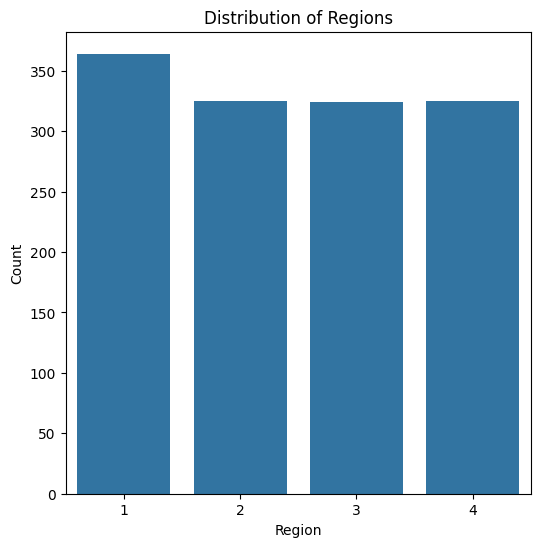

In [39]:
plt.figure(figsize=(6, 6))
sns.countplot(x='region', data=ins)
plt.title('Distribution of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

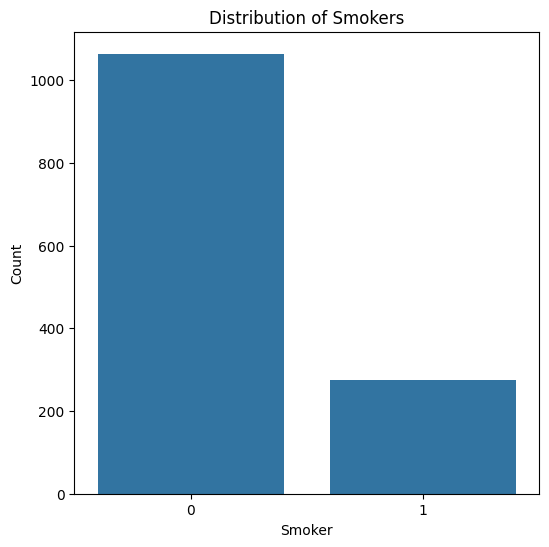

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(x='smoker', data=ins)
plt.title('Distribution of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

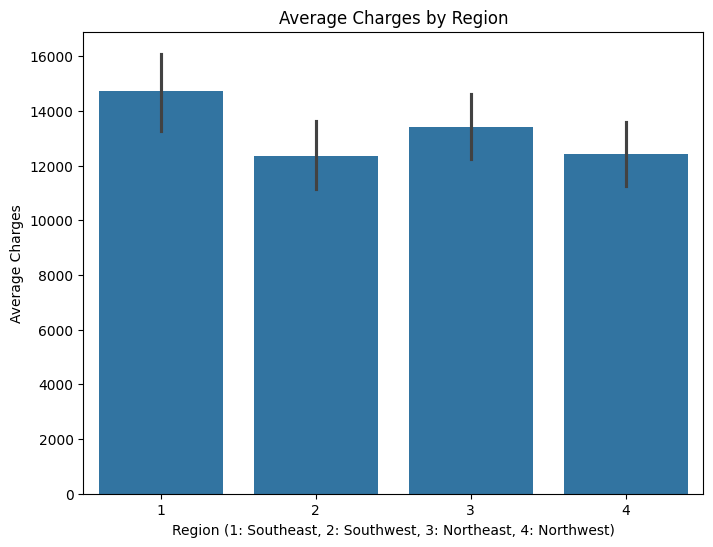

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=ins)
plt.title('Average Charges by Region')
plt.xlabel('Region (1: Southeast, 2: Southwest, 3: Northeast, 4: Northwest)')
plt.ylabel('Average Charges')
plt.show()